<a href="https://colab.research.google.com/github/wagneraljr/GraphEmbeddingExamples/blob/main/Node_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Montando drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Python/MAG

/content/drive/MyDrive/Python/MAG


# Instalando Pacotes

In [ ]:
!pip install node2vec
!pip install stellargraph

     |████████████████████████████████| 435 kB 36.6 MB/s 


# Imports

In [ ]:
import networkx as nx
import pandas as pd

from node2vec import Node2Vec
import node2vec.edges as emb

import matplotlib.pyplot as plt
%matplotlib inline

# Carregando Dataset

In [ ]:
dados19 = pd.read_csv('registros_2019-07-14.csv', sep=';', skiprows=1)

In [ ]:
dados19.columns

Index(['Cód  Empresa', 'Empresa', 'Nº Voo', 'Equip ', 'Seg', 'Ter', 'Qua',
       'Qui', 'Sex', 'Sáb', 'Dom', 'Quant  Assentos', 'Nº SIROS',
       'Situação SIROS', 'Data Registro', 'Início Operação', 'Fim Operação',
       'Natureza Operação', 'Nº Etapa', 'Cód  Origem', 'Arpt Origem',
       'Cód Destino', 'Arpt Destino', 'Horário Partida', 'Horário Chegada',
       'Tipo Serviço', 'Objeto Transporte', 'Codeshare'],
      dtype='object')

In [ ]:
dados19 = dados19[['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom', 'Quant  Assentos', 'Natureza Operação', 'Cód  Origem', 'Cód Destino', 'Horário Partida', 'Horário Chegada', 'Objeto Transporte']]

In [ ]:
dados19.rename(columns = {'Cód  Origem': 'source', 'Cód Destino': 'target', 'Natureza Operação': 'label'}, inplace = True)

In [ ]:
dados19.dropna(inplace=True)

In [ ]:
dados19['label'].replace({"DOMÉSTICA" : "10", "INTERNACIONAL" : "11"}, inplace=True)

In [ ]:
dados19['Objeto Transporte'].replace({"PASSAGEIROS" : "20", "CARGA" : "21"}, inplace=True)

In [ ]:
def get_sec(time_str):
    """Get Seconds from time."""
    h, m= time_str.split(':')
    return int(h) * 3600 + int(m) * 60

In [ ]:
dados19['Horário Chegada'] = [get_sec(i) for i in dados19['Horário Chegada']]

In [ ]:
dados19['Horário Partida'] = [get_sec(i) for i in dados19['Horário Partida']]

In [ ]:
dados19

,Seg,Ter,Qua,Qui,Sex,Sáb,Dom,Quant Assentos,label,source,target,Horário Partida,Horário Chegada,Objeto Transporte
0,0,2,0,4,5,6,7,354,11,LFPO,SBKP,29700,72900,20
1,0,2,0,4,5,0,7,283,11,LFPO,SBKP,29700,72900,20
2,0,0,0,0,0,6,0,283,11,LFPO,SBKP,29700,72900,20
3,0,2,0,4,5,6,7,283,11,LFPO,SBKP,29700,72900,20
4,0,2,0,4,5,6,7,354,11,LFPO,SBKP,29700,72900,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49846,0,0,0,0,0,0,7,0,11,SBKP,SCEL,3300,17400,21
49847,0,0,0,0,0,0,7,0,11,SCEL,SAEZ,22500,28800,21
49848,1,0,0,0,0,0,0,0,11,SAEZ,SBKP,84000,6300,21
49849,1,0,0,0,0,0,0,0,11,SBKP,SKBO,11700,31800,21


In [ ]:
dados19.loc[dados19['source'] == 'SBCZ']

,Seg,Ter,Qua,Qui,Sex,Sáb,Dom,Quant Assentos,label,source,target,Horário Partida,Horário Chegada,Objeto Transporte
25675,1,0,0,4,0,0,0,186,0,SBCZ,SBRB,23700,27900,0
25678,0,0,0,0,0,0,7,138,0,SBCZ,SBRB,23700,27900,0
25680,0,0,0,4,0,0,0,138,0,SBCZ,SBRB,23700,27900,0
25681,0,0,0,4,0,0,7,186,0,SBCZ,SBRB,23700,27900,0
25684,0,0,0,4,0,0,0,138,0,SBCZ,SBRB,23700,27900,0
25685,1,0,0,4,0,0,0,186,0,SBCZ,SBRB,23700,27900,0
25687,1,0,0,0,0,0,0,186,0,SBCZ,SBRB,23700,27900,0
25688,0,0,0,4,0,0,0,138,0,SBCZ,SBRB,23700,27900,0
25691,1,0,0,0,0,0,0,138,0,SBCZ,SBRB,23700,27900,0
25695,1,0,0,0,0,0,0,186,0,SBCZ,SBRB,23700,27900,0


In [ ]:
dados19.loc[dados19['target'] == 'SBCZ']

,Seg,Ter,Qua,Qui,Sex,Sáb,Dom,Quant Assentos,label,source,target,Horário Partida,Horário Chegada,Objeto Transporte
25663,1,0,0,4,0,0,0,186,0,SBRB,SBCZ,15900,19800,0
25664,1,0,0,0,0,0,0,138,0,SBRB,SBCZ,16200,20100,0
25665,0,0,0,4,0,0,7,186,0,SBRB,SBCZ,15900,19800,0
25666,0,0,0,0,0,0,7,138,0,SBRB,SBCZ,15900,19800,0
25667,0,0,0,4,0,0,0,138,0,SBRB,SBCZ,15900,19800,0
25668,0,0,0,4,0,0,0,186,0,SBRB,SBCZ,16200,20100,0
25669,1,0,0,0,0,0,0,138,0,SBRB,SBCZ,16200,20100,0
25670,1,0,0,0,0,0,0,186,0,SBRB,SBCZ,15900,19800,0
25671,0,0,0,4,0,0,0,186,0,SBRB,SBCZ,16200,20100,0
25672,1,0,0,4,0,0,0,186,0,SBRB,SBCZ,15900,19800,0


# Gerando Grafo

In [ ]:
graph = nx.from_pandas_edgelist(dados19, source='source', target='target', create_using=nx.MultiDiGraph())
type(graph)

networkx.classes.multidigraph.MultiDiGraph

In [ ]:
G = nx.DiGraph(graph)
type(G)

networkx.classes.digraph.DiGraph

In [ ]:
#G = StellarDiGraph(edges=dados19, edge_type_column='label')
#print(G.info())

In [ ]:
#graph = G.to_networkx()

# Testes

In [ ]:
n2v = Node2Vec(graph,dimensions=128, walk_length=50)
model = n2v.fit(window=5, iter=5, compute_loss=True)

Computing transition probabilities:   0%|          | 0/218 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:04<00:00,  2.01it/s]


In [ ]:
model.get_latest_training_loss()

3450451.5

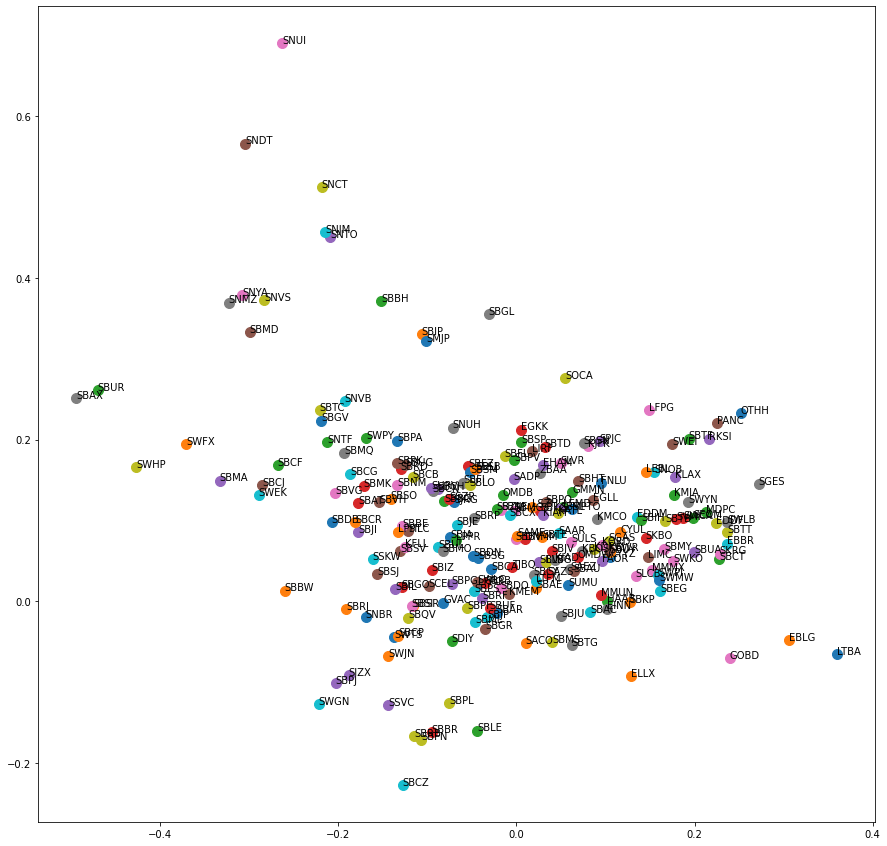

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))

for x in graph.nodes():
  v = model.wv.get_vector(str(x))
  ax.scatter(v[0], v[1], s=100)
  ax.annotate(str(x), (v[0], v[1]), fontsize=10)

In [ ]:
edges_embs = emb.HadamardEmbedder(keyed_vectors=model.wv)

In [ ]:
edges_embs = emb.AverageEmbedder(keyed_vectors=model.wv)

In [ ]:
lista = list(set(graph.edges()))

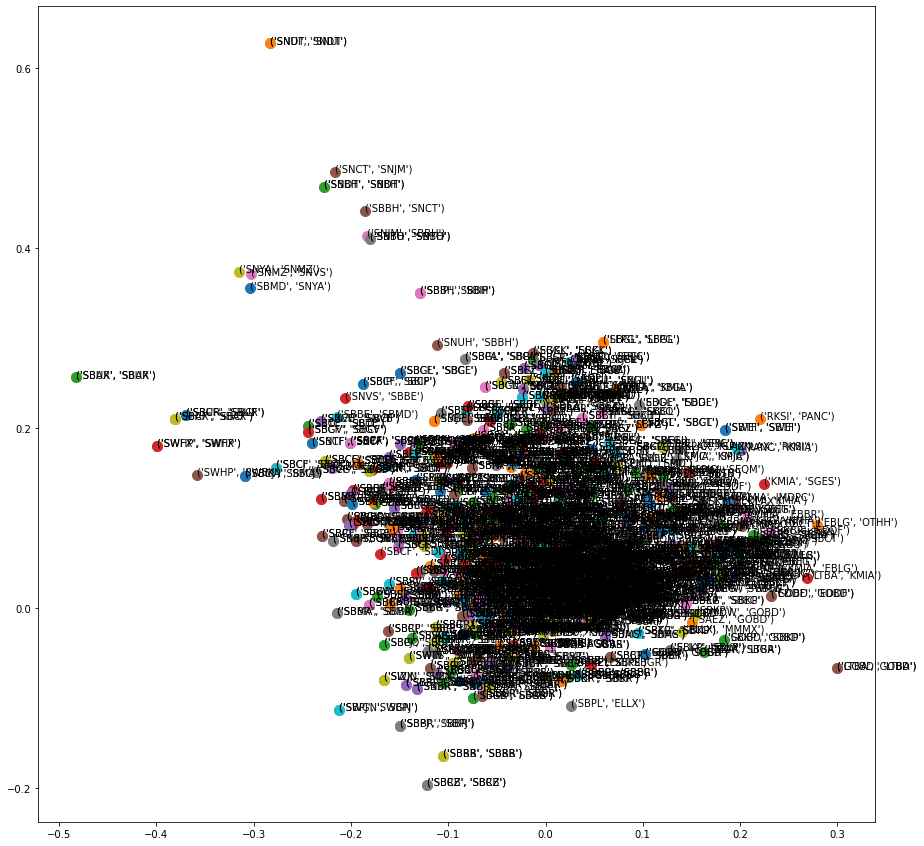

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))

for x in lista:
    
    v = edges_embs[(str(x[0]), str(x[1]))]
    ax.scatter(v[0],v[1], s=100)
    ax.annotate(str(x), (v[0],v[1]), fontsize=10)

In [ ]:
import os

import stellargraph as sg
from stellargraph.mapper import DirectedGraphSAGENodeGenerator
from stellargraph.layer import DirectedGraphSAGE

from tensorflow.keras import layers, optimizers, losses, metrics, Model
from sklearn import preprocessing, feature_extraction, model_selection
from IPython.display import display, HTML

In [ ]:
G = sg.StellarDiGraph.from_networkx(graph)
type(G)

stellargraph.core.graph.StellarDiGraph

In [ ]:
edge_type = list(dados19['label'])

['11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11

In [ ]:
train_subjects, test_subjects = model_selection.train_test_split(
    edge_type, train_size=0.1, test_size=None, stratify=edge_type
)

In [ ]:
target_encoding = preprocessing.LabelBinarizer()

train_targets = target_encoding.fit_transform(train_subjects)
test_targets = target_encoding.transform(test_subjects)

In [ ]:
batch_size = 50
in_samples = [5, 2]
out_samples = [5, 2]

In [ ]:
generator = DirectedGraphSAGENodeGenerator(G, batch_size, in_samples, out_samples)

RuntimeError: ignored

In [ ]:
dataset = datasets.Cora()
display(HTML(dataset.description))
G, node_subjects = dataset.load(directed=True)

In [ ]:
type(node_subjects)

pandas.core.series.Series

In [ ]:
set(node_subjects)

{'Case_Based',
 'Genetic_Algorithms',
 'Neural_Networks',
 'Probabilistic_Methods',
 'Reinforcement_Learning',
 'Rule_Learning',
 'Theory'}